# Regressão linear múltipla

### O que é uma regressão linear múltipla ?


<div style="text-align: right">  

É um modelo de regressão que possui mais de um regressor e o seu objetivo é mensurar o impacto sobre a média de $y$ de mais de uma covariável. Esse modelo é dado conforme abaixo

$ y_t = \beta_1 + \beta_2X_{t2} + \beta_3X_{t3} + \dots + \beta_kX_{tk} + e_t$ onde $t = 1,\dots, T$

Essa estrutura com **K** regressores também pode ser chamada de **função de regressão real** ou **populacional**. Note que o modelo de regressão simples é obtido como um caso particular quando tomamos $k = 2$.
</div>

<div style="text-align: right">
    
O parâmetro $\beta_1$ (o intercepto) é a média de $y_t$ quando $X_{t1}=X_{t2}=\dots=X_{tk} = 0$. Já os parâmetros $\beta_2, \beta_3, \dots, \beta_k$ são chamados de **coeficientes parciais de regressão** ou **coeficientes de regressão reais** (ou **Populacionais**).

Considere $j = 2, \dots, k$, então o parâmetros $\beta_j$ é o impacto sobre a média de $y_t$ quando o *j-nésimo* regressor aumenta e todos os demais regressores não se alteram.
</div>

O modelo múltiplo pode ser escrito na forma matricial $y = X\beta + e$, onde

1) $y$ é um vetor das variáveis de resposta (T x 1),

2) $\beta$ é um vetor de parâmetros (K x 1),

3) $e$ é um vetor de erros (T x 1),

4) $X$ é uma matriz com os regressores (T x K).

Ou seja,

$\left[\begin{matrix} y_1 & \\ y_2 &\\ \vdots & \\ y_t \end{matrix}\right] =  \left[ \begin{matrix}  1 & X_{12} & X_{13} & \dots & X_{1K}\\ 1 & X_{22} & X_{23}& \dots & X_{2K}\\ \vdots & \vdots & \vdots & \ddots& \vdots\\ 1 & X_{T2}& X_{T3}& \dots & X_{TK} \end{matrix} \right] \cdot \left[\begin{matrix} \beta_0 & \\ \beta_1 &\\ \vdots & \\ \beta_{t-1}\end{matrix}\right] + \left[\begin{matrix} e_1 & \\ e_2 &\\ \vdots & \\ e_t\end{matrix}\right]$


Sem intercepto,

$\left[\begin{matrix} y_1 & \\ y_2 &\\ \vdots & \\ y_t \end{matrix}\right] =  \left[ \begin{matrix}  X_{12} & X_{13} & \dots & X_{1K}\\ X_{22} & X_{23}& \dots & X_{2K}\\ \vdots & \vdots & \ddots& \vdots\\ X_{T2}& X_{T3}& \dots & X_{TK} \end{matrix} \right] \cdot \left[\begin{matrix} \beta_1 & \\ \beta_2 &\\ \vdots & \\ \beta_{t}\end{matrix}\right] + \left[\begin{matrix} e_1 & \\ e_2 &\\ \vdots & \\ e_t\end{matrix}\right]$

### Suposições do modelo

1) O modelo está corretamente especificado (**Ausência de viés**);

2) O modelo é linear nos parâmetros;

3) Os valores de *X* são independentes do termo de erro. A covariância entre $e_i$ e cada variável de *X* é igual a zero

 $cov(e_t, X_{2t})$ = $cov(e_t, X_{3t})$ = $\dots$ = $cov(e_t, X_{kt})$ = $0$ (**Ortogonalidade**);

4) A esperança dos erros tem média zero : $E(e) = 0$, para todo $t$;



5) A variância dos erros é constante :$Var(e_i) = \sigma^2$, para todo $t$ (**Homocedasticidade**);

6) A covariância entre os erros é zero :$Cov(e_t,e_s) = 0$, para todo $t \neq s$ (**Ausência de autocorrelação residual**);

7) O número de observações deve ser maior que o número de parâmetros;

8) Cada variável *X* deve ser linearmente independente uma da outra (**Ausência de multicolinearidade**);

9) Os erros são normalmente distribuídos.

# Regressão múltipla em *Python*

## Importando as bibliotecas

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor


## Importando os dados

<div style="text-align: right">  

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 variáveis, sendo uma variável dependente, com período de um ano. Os dados podem ser obtidos [aqui](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) e [aqui](https://edisciplinas.usp.br/mod/resource/view.php?id=3239600&forceview=1).

</div>

In [3]:
#usando a biblioteca Pandas para importação dos dados
cerveja = pd.read_csv('Consumo_cerveja.csv')


In [4]:
#Primeiras linhas da base de dados
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [5]:
#últimas linhas da base de dados
cerveja.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


In [6]:
#dimensão da base de dados
cerveja.shape

(365, 7)

In [7]:
#Não há valores faltantes
cerveja.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

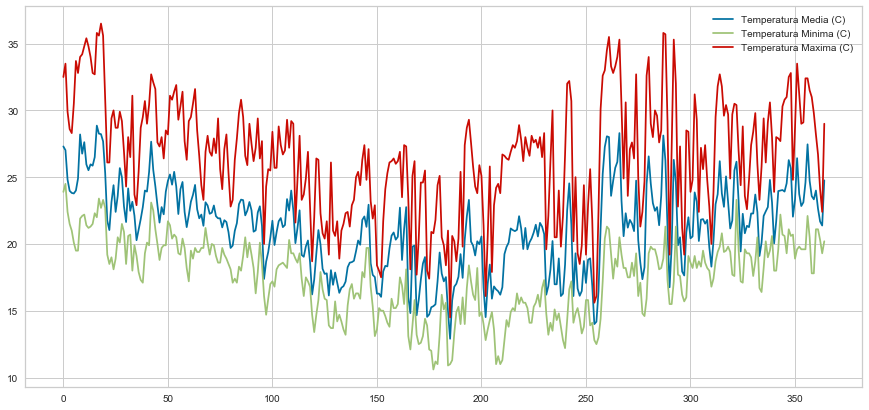

In [8]:
#Temperaturas
cerveja[['Temperatura Media (C)', 
         'Temperatura Minima (C)',
         'Temperatura Maxima (C)']].plot(figsize=(15,7));


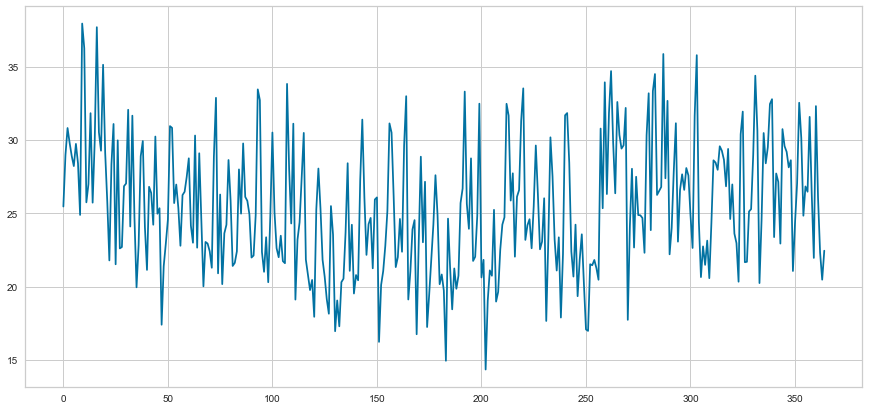

In [9]:
cerveja['Consumo de cerveja (litros)'].plot(figsize=(15,7));


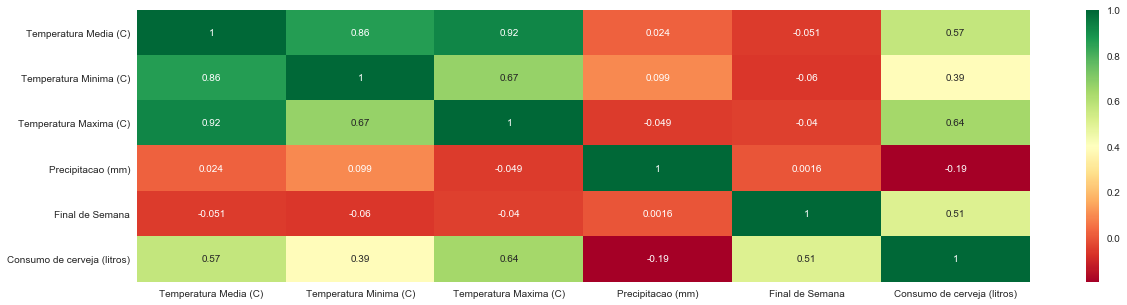

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(cerveja.corr(), annot = True, cmap= "RdYlGn");


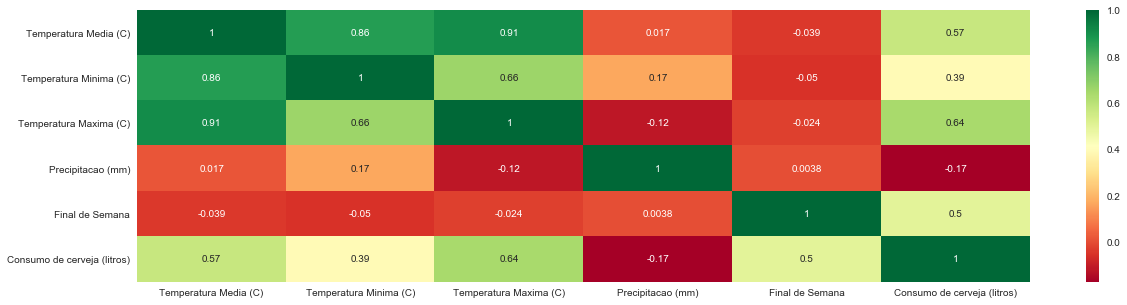

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(cerveja.corr('spearman'), annot = True, cmap= "RdYlGn");

In [12]:
cerveja.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


### Definindo as variáveis do modelo

In [13]:
#definindo as variáveis

#Variáveis independentes
X = cerveja.drop(['Consumo de cerveja (litros)','Data'],axis=1)

#Variável dependentes
y = cerveja['Consumo de cerveja (litros)']


### Gerando o modelo

Nessa etapa são gerado dois modelos: um com intercepto (ou constante) e ou sem. A presença ou não do intercepto gera mudanças consideráveis nas estatísticas geradas.

#### Modelo com intercepto

In [14]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo com intercepto                           
=======================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.723
Model:                                     OLS   Adj. R-squared:                  0.719
Method:                          Least Squares   F-statistic:                     187.1
Date:                         Mon, 28 Jun 2021   Prob (F-statistic):           1.19e-97
Time:                                 23:26:04   Log-Likelihood:                -824.07
No. Observations:                          365   AIC:                             1660.
Df Residuals:                              359   BIC:                             1684.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4447      0.845      7.627      0.000       4.783       8.107
Temperatura Media (C)      0.0308      0.188      0.164      0.870      -0.339       0.401
Temperatura Minima (C)    -0.0190      0.110     -0.172      0.863      -0.236       0.198
Temperatura Maxima (C)     0.6560      0.095      6.895      0.000       0.469       0.843
Precipitacao (mm)         -0.0575      0.010     -5.726      0.000      -0.077      -0.038
Final de Semana            5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo sem intercepto

In [15]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Sumário do modelo sem intercepto                                
================================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared (uncentered):                   0.991
Model:                                     OLS   Adj. R-squared (uncentered):              0.991
Method:                          Least Squares   F-statistic:                              7620.
Date:                         Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                                 23:26:04   Log-Likelihood:                         -851.48
No. Observations:                          365   AIC:                                      1713.
Df Residuals:                              360   BIC:                                      1732.
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Temperatura Media (C)      0.1192      0.202      0.590      0.555      -0.278       0.516
Temperatura Minima (C)     0.1146      0.117      0.977      0.329      -0.116       0.345
Temperatura Maxima (C)     0.7313      0.102      7.179      0.000       0.531       0.932
Precipitacao (mm)         -0.0552      0.011     -5.112      0.000      -0.076      -0.034
Final de Semana            5.4816      0.289     18.989      0.000       4.914       6.049
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analisando a primeira parte do relatório

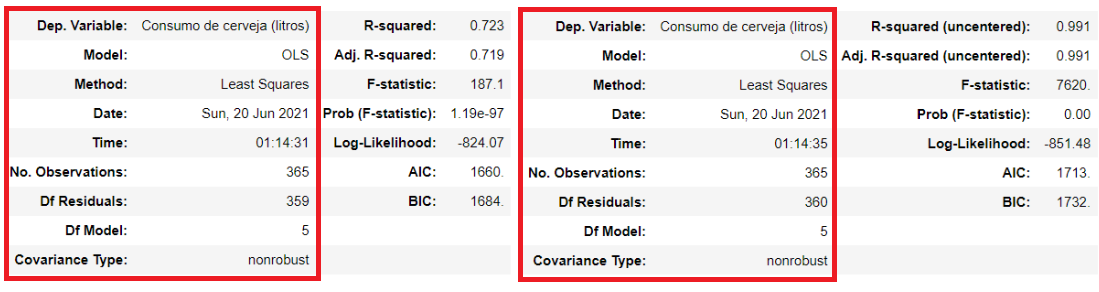

In [16]:
from IPython.display import Image
Image(filename='descrição.png', width = 3000)


**Informações**: a variável dependente, o tipo de modelo, a data e hora que ele foi gerado, o número de observações, os graus de liberdade (*degrees freedom*) dos resíduos e dos modelos e a covariância do modelo é não robusta, ou seja, não está calculada para minimizar ou eliminar variáveis.

### $R^2$ e $R^2$ ajustado - Coeficiente de determinação (*R-squared* )

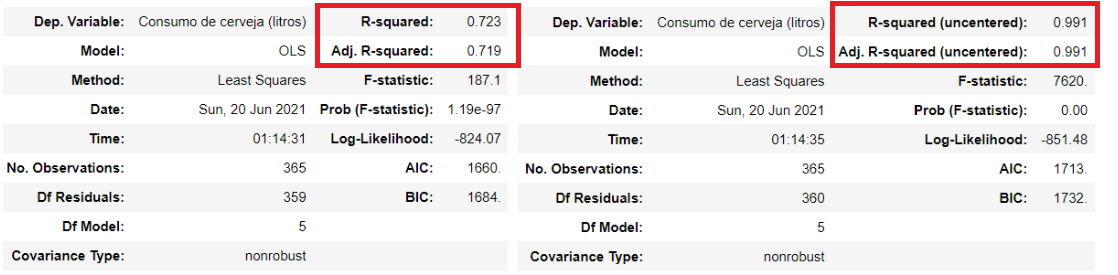

In [17]:
from IPython.display import Image
Image(filename='r2.png', width = 3000)


<div style="text-align: right"> 

O que é o $R^2$ ?

O coeficiente de determinação é uma proporção que ajuda a entender o quanto as variáveis explicativas explicam a variação da média do consumo de cerveja. No sumário do modelo com intercepto, o coeficiente de determinação foi de 72.3%; já no modelo sem intercepto, o valor foi de 99.1%.

</div>

O $R^2$ é um métrica que varia de 0 a 1, se o modelo tiver **intercepto**; caso contrário usa-se o $R^2$ não centrado (caso do modelo 2).

O $R^2$ varia entre 0 e 1, então quanto maior o $R^2$ melhor é o modelo de regressão, pois teria uma maior a capacidade de explicação. 

Uma limitação dessa medida é que com a inserção de regressores ao modelo o $R^2$ tende a aumentar.

##### $R^2$ ajustado

Diferente do $R^2$, o $R^2$ ajustado não sofre a limitação de nunca decair. Caso seja inserido um modelo de regressão uma variável que não seja importante o $R^2$ ajustado irá diminuir.

Uma característica do $R^{2}$ ajustado é que ele pode ser negativo e por isso ele não pode ser interpretado como uma proporção. Além disso essa medida serve para fazer a comparação entre modelos diferentes.

No nosso exemplo o $R^{2}$ ajustado caiu um pouco no primeiro modelo, porém manteve-se no segundo modelo.


Fórmula do $R^2$

$\sum_{t=1}^T (y_t - \overline{y})^2  =  \sum_{t=1}^T (\hat{y}_t - \overline{y})^2 + \sum_{t=1}^T (y_t - \hat{y}_t)^2$

$SST = SSR + SSE$

$R^2 = \dfrac{SSR}{SST}$ ou $1 - \dfrac{SSE}{SST}$

**SST** = Soma dos quadrados totais ( *sum of squares total* )

**SSR** = Soma dos quadrados da regressão ( *sum of squares due to regression* )

**SSE** = Soma dos quadrados dos resíduos ( *sum of squares error* )

Fórmula do $R^2$ ajustado 

$\overline{R}^2 = \boxed{1 - \dfrac{SSE/(T-K)}{SST/(T-1)}}$ ou $\boxed{1 - \Bigg(\dfrac{T-K}{T-1}\Bigg)(1-R^2)}$ ou $\boxed{1 - (1-R^2)\dfrac{T-1}{T-K}}$

**T** = Número de observações.

**K** = Número de parâmetros.

### *F-statistic* e *Prob (F-statistic)*
#### Teste de significância conjunta dos parâmetros do modelo

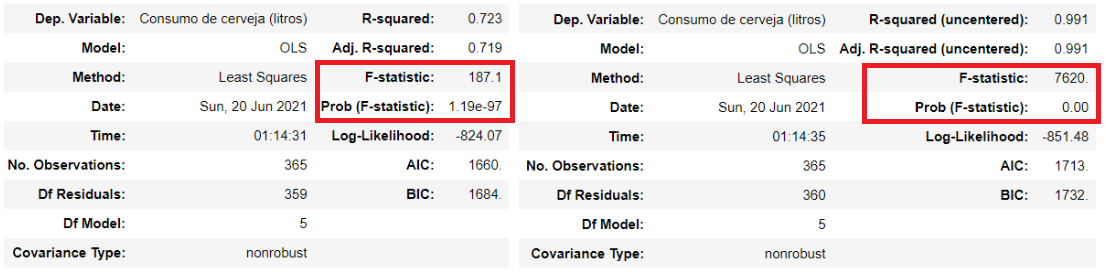

In [18]:
from IPython.display import Image
Image(filename='testef.png', width = 3000)

Hipóteses do teste:

$H_0$: $\beta_1=\beta_2 =\beta_3 = \beta_4= ... =\beta_k =0$

$H_1$: não $H_0$ (Pelo menos uma das inclinações é diferente de zero)

O que esse teste de hipótese teste é se os coeficientes são conjuntamente nulos e para esse teste deve-se **rejeitar** a hipótese nula e para rejeitar a hipótese nula precisamos que o valor da estatística gerado no modelo esteja fora da região de aceitação de $H_0$. Esse teste é conhecido como o **teste F**.

A regra de rejeição é que $F > F_{K-1;T-K;1-\alpha}$.

A fórmula de cálculo da estatística *F*, para primeiro modelo, pode ser expressa da seguinte forma:

$F= \dfrac{R²/(k-1)}{(1-R²)/(n-k)} = \dfrac{0.723/(6-1)}{1-0.723/(365-6)}$

$= \dfrac{0.723/5}{0.277/359}  =\dfrac{0.1446}{0.0007715877437} \approx 187.1$

onde $k$ são os número de parâmetros e $n$ o número de observações.

O valor foi de 187.1 e observando a tabela da distribuição *F de Snedecor* a 5% [aqui](https://edisciplinas.usp.br/pluginfile.php/3333945/mod_resource/content/1/Distribuicao%20F%205%25.pdf), veremos que esse valor fica muito acima dos valores limites seja qual for o grau de liberdade (os graus de liberdade são definidos como $n-k$).

Conclusão rejeitamos $H_0$ e os parâmetros/coeficientes são *conjuntamente significativos*.

O **Prob(F-statistic)** diz a mesma coisa que o *F-statistic* : probabilidade de $H_0$ ser verdadeira.

### *Log-Likelihood*

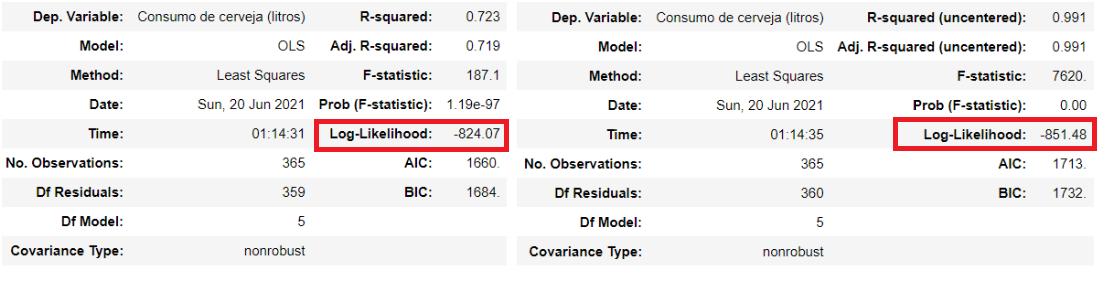

In [19]:
from IPython.display import Image
Image(filename='likelihood.png', width = 3000)


1) Usada para fazer comparação entre modelos;

2) Varia de $-\infty$ a $+\infty$;

3) Quanto maior o valor, melhor o modelo.

### Critérios de Informação

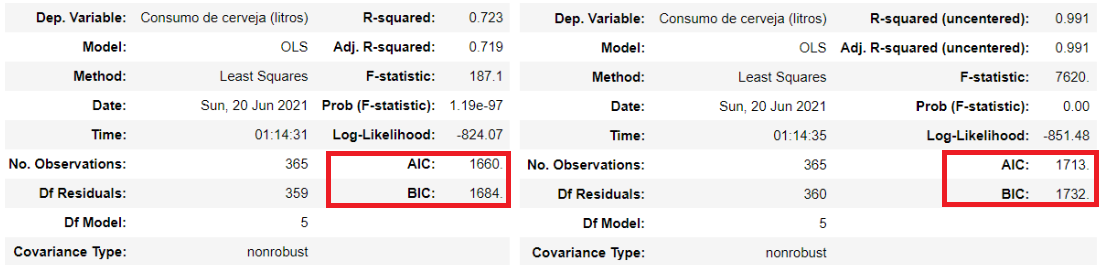

In [20]:
from IPython.display import Image
Image(filename='critérios.png', width = 3000)


**AIC (Akaike information criterion)** e **BIC (Bayesian information criterion)** são usado para comparar modelos e possuem uma fundamentação estatística e matemática mais rigorosa do que o $R^2$ ajustado. 


Existem ainda o **AICc** (versão alternativa do **AIC**), o **HQIC** (Critério de informação *Hannan–Quinn*), **FIC** (Critério de informação focada) e o **DIC** (Critério de informação de desvio).

Qualquer um desses pode ser usado, porém o **AIC** é o mais frequentemente.

Mais informações [aqui](https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC).

Fórmulas dos critérios de informação

AIC = $\dfrac{2K}{T} + log\bigg(\dfrac{SSE}{T}\bigg)$

BIC = $\dfrac{log(T)\cdot K}{T} + log\bigg(\dfrac{SSE}{T}\bigg)$

## Analisando a segunda parte do relatório

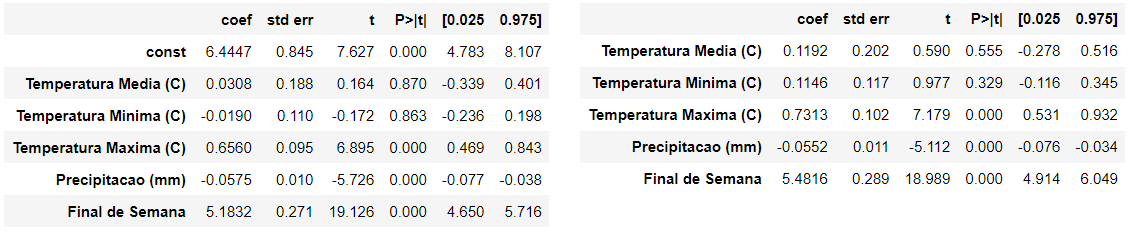

In [21]:
from IPython.display import Image
Image(filename='parte2.png', width = 3000)


Nessa segunda parte constam os parâmetros, o erro padrão de cada coeficiente, a estatística *t*, seus respectivos *p-valores* e os intervalos de confiança.

### Coeficientes ou parâmetros

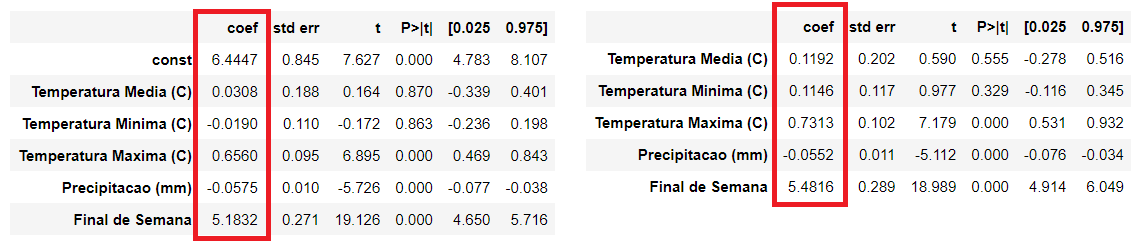

In [22]:
from IPython.display import Image
Image(filename='coeficientes.png', width = 3000)


#### Interpretando os coeficientes

A constante é a média da variável dependente, quando todos os valores das outras variáveis forem zero.

Os parâmetros das variáveis independentes medem o impacto na variação média da variável dependente. 

 - **Modelo 1** : o aumento de uma unidade na temperatura máxima, aumenta o consumo de cerveja em 0.65 litros;

 - **Modelo 2** : o aumento de uma unidade na temperatura máxima, aumenta o consumo de cerveja em 0.73 litros.

Para a variável *dummy* Final de Semana:

 - **Modelo 1** : Se o dia for em um **fim de semana** o consumo de cerveja aumenta em 5.1832 litros;

 - **Modelo 2** : Se o dia for em um **fim de semana** o consumo de cerveja aumenta em 5.4816 litros.

### Erro padrão

Erro padrão é uma estimativa do desvio padrão do coeficiente, uma medida da quantidade de variação no coeficiente ao longo de seus pontos de dados.

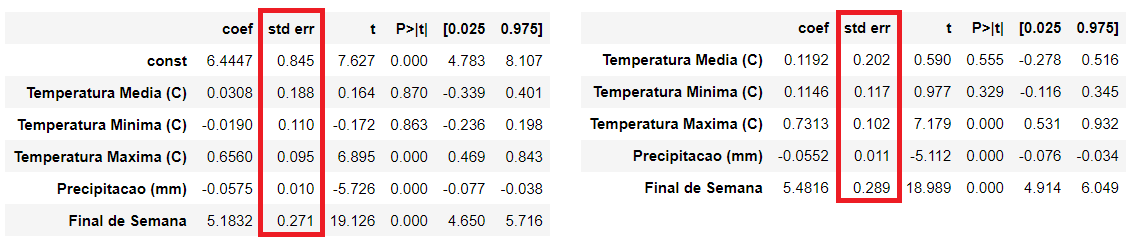

In [23]:
from IPython.display import Image
Image(filename='erro padrão.png', width = 3000)


### Teste de significância individual dos parâmetros

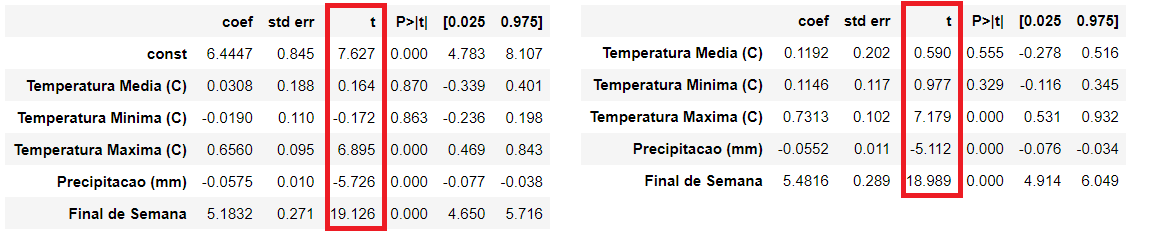

In [24]:
from IPython.display import Image
Image(filename='teste t.png', width = 3000)


Esse resultado faz parte do teste de hipótese do parâmetro. Nesse teste de hipótese testamos se o parâmetro é estatisticamente igual a um determinado valor, ou seja,

$H_0$: $\beta_{j}=\beta_{j}^{0} = 0$

$H_1$: $\beta_{j}\ne \beta_{j}^{0} \ne 0$ 

O ideal para esse teste é que rejeitemos a hipótese nula. A regra de rejeição de $H_{0}$ é $t > t_{T-K;1 -\alpha/2}$.

Calculando *t* para o parâmetro da variável Temperatura Máxima:

$t = \dfrac{b_{j} - \beta_{j}^{0}}{ep(\beta_{j})} = \dfrac{b_{j} - 0}{ep(b_{j})} = \dfrac{0.6560}{0.095} = 6.895$

Conforme a tabela *t-student* [aqui](https://edisciplinas.usp.br/pluginfile.php/1786946/mod_resource/content/1/Tabelat-student.pdf) os nossos limites da região de aceitação são -2.009 e +2.009 (mais de 50 graus de liberdade e nível de significância de 0.025%, por ser um teste bilateral). Como o resultado excede esses limites da região de aceitação da hipótese nula, rejeitamos $H_{0}$.

Apenas as variáveis Temperatura média e Temperatura Mínima os valores *t* encontram-se dentro desses intervalos, sendo assim estatisticamente nulos.

### *P-valor*

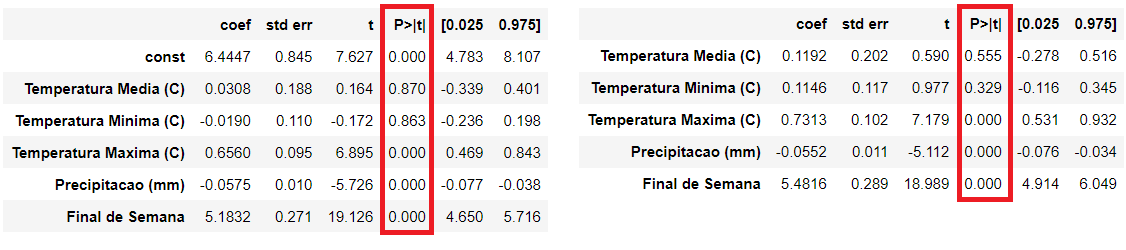

In [25]:
from IPython.display import Image
Image(filename='pvalor.png', width = 3000)


**O que é um *p-valor* ?**

É uma estatística que relata os resultados de um teste de hipótese, essa estatística satisfaz $0 \leq p(x) \leq 1$. É conhecido como **nível de significância exato** ou **observado** ou **probabilidade exata de cometer um erro de Tipo I** (rejeitar a hipótese nula quando ela é verdadeira).

Quanto maior o valor dessa estatística, maior a evidência a favor da hipótese alternativa do teste. Aqui o teste é da significância individual dos parâmetros.

Para constante, Temperatura Média, Temperatura Mínima, Precipitação e Final de semana o *p-valor* é menor que 0.05, então rejeitamos a hipótese nula (parâmetro é estatisticamente igual a zero).

### Intervalos de confiança

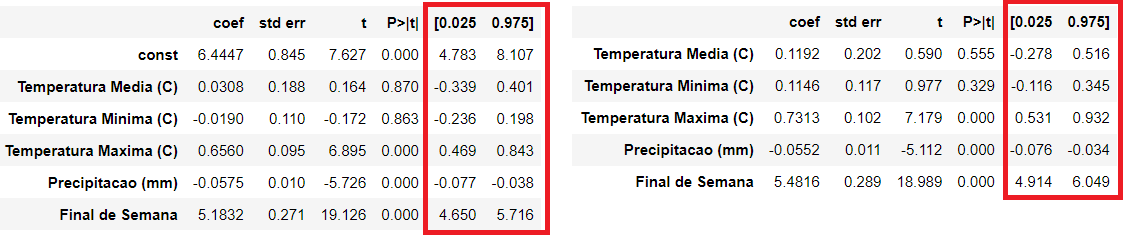

In [26]:
from IPython.display import Image
Image(filename='ICs.png', width = 3000)


## Diagnóstico do modelo

Objetivo : Identificar falhas de especificação do modelo.

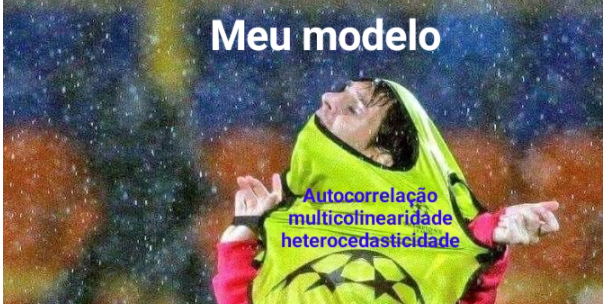

In [27]:
from IPython.display import Image
Image(filename='messi2.png', width = 1000, height = 200)


## Analisando a terceira parte

A terceira parte trata da análise residual e identificação de multicolinearidade.

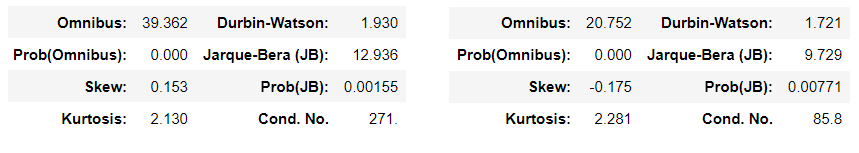

In [28]:
from IPython.display import Image
Image(filename='parte3.png', width = 3000)


### Teste *Omnibus*

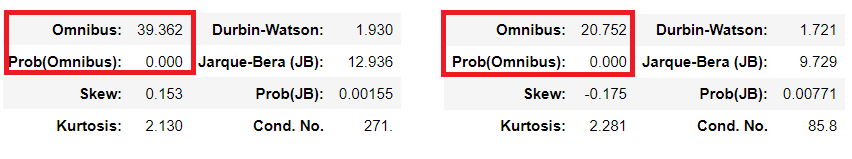

In [29]:
from IPython.display import Image
Image(filename='omnibus.png', width = 3000)


Descreve a normalidade da distribuição de nossos resíduos usando inclinação e curtose como medidas. Um 0 indicaria normalidade perfeita.

Já a **Prob(Omnibus)** é um teste estatístico que mede a probabilidade de os resíduos serem normalmente distribuídos. Um 1 indicaria uma distribuição perfeitamente normal. 

Calculando o teste *Omnibus* para os modelos.

In [30]:
nome = ['Estatística', 'Probabilidade']
teste = sms.omni_normtest(modelo1.resid)
lzip(nome, teste)


[('Estatística', 39.36215025856847), ('Probabilidade', 2.8354217956923733e-09)]

In [31]:
nome2 = ['Estatística', 'Probabilidade']
teste2 = sms.omni_normtest(modelo2.resid)
lzip(nome2, teste2)


[('Estatística', 20.752436672582746),
 ('Probabilidade', 3.1164892524943026e-05)]

### Assimetria e Curtose

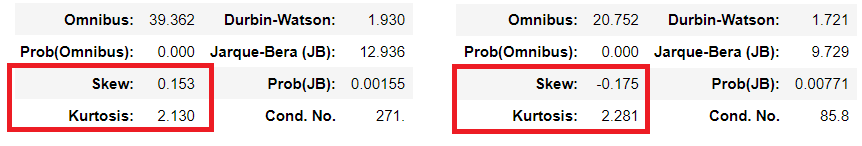

In [32]:
from IPython.display import Image
Image(filename='assimetria e curtose.png', width = 3000)


Em uma situação ideal (distribuição normal) a assimetria teria o valor 0 e a curtose valor 3.

Calculando a assimetrias e curtoses dos modelos.

In [33]:
print('Assimetria dos resíduos (modelo 1) :',modelo1.resid.skew())
print('Assimetria dos resíduos (modelo 2) :',modelo2.resid.skew())
#ou usando a função skew() da biblioteca Scipy


Assimetria dos resíduos (modelo 1) : 0.15367370443694028
Assimetria dos resíduos (modelo 2) : -0.17575242160872598


In [34]:
print('Curtose dos resíduos (modelo 1) :',modelo1.resid.kurtosis())
print('Curtose dos resíduos (modelo 2) :',modelo2.resid.kurtosis())
#ou usando a função kurtosis() da biblioteca Scipy


Curtose dos resíduos (modelo 1) : -0.8654338840115119
Curtose dos resíduos (modelo 2) : -0.7124875136674018


### Teste de autocorrelação *Durbin-Watson*

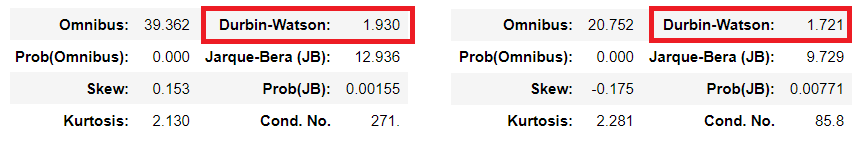

In [35]:
from IPython.display import Image
Image(filename='dw.png', width = 3000)


No teste *Durbin-Watson*

- se o valor do teste estiver próximo de 4, então há evidência para autocorrelação negativa;
- se estiver próximo de 2, evidência para ausência de autocorrelação;
- e se estiver perto de 0, há evidência para autocorrelação positiva.

Para o primeiro modelo há evidência para ausência de autocorrelação. 

Para o segundo modelo, a evidência de ausência de autocorrelação é um pouco mais fraca.

### Teste de normalidade *Jarque-Bera*

Suposições: $E(e) = 0$, para todo $t$ e $Var(e) = \sigma^2$, para todo $t$ (Homocedasticidade).

Os erros precisam seguir uma distribuição normal.

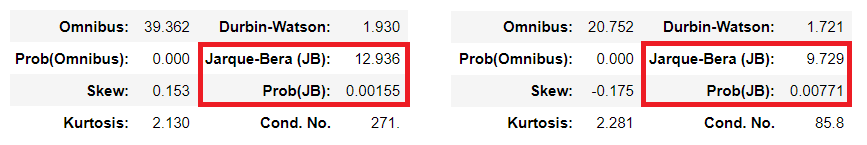

In [36]:
from IPython.display import Image
Image(filename='jb.png', width = 3000)


O *Jarque-Bera* testa se a distribuição dos dados é uma distribuição normal ($H_{0}$) em comparação com uma hipótese alternativa ($H_{1}$) em que os dados seguem alguma outra distribuição. A estatística do teste é baseada em dois momentos dos dados, a assimetria e a curtose, e possui uma $\chi^{2}_{2;1-\alpha}$ distribuição assintótica.

A estatística do teste *Jarque-Bera* é dada pela equação abaixo:

$S_{JB} = T\bigg[\dfrac{\hat{\alpha}_{1}^{2}}{6} + \dfrac{\big(\hat{\alpha}_{2} - 3\big)^{2}}{24} \bigg]$, onde $\hat{\alpha}_{1}$ é o coeficiente de assimetria e $\hat{\alpha}_{2}$ o coeficiente de curtose.

Se $S_{JB} > \chi^{2}_{2;1-\alpha}$, devemos rejeitar $H_{0}$.

Para o primeiro modelo o *p-valor* teve um valor de 0.00155, bem abaixo do nível de significância de 5%, então rejeitamos $H_0$. Para o segundo modelo, 0.00771.

### Multicolinearidade

Regressores com alta correlação entre si. Há um aumento da variância do estimador tornando-o menos eficientes, mas ele ainda é um *BLUE*.

Tipos multicolinearidade:

- **Exata (perfeita)** : duas variáveis, onde uma é função da outra;

*Consequências*: Não é posssível calcular o estimador *MQO*.


- **Quase exata (imperfeita)**

*Consequências 1*: atrapalha a estimação dos efeitos dos coeficientes.

*Consequências 2*: parâmetros individualmente significativos, mas não conjuntamente.

*Consequências 3*: sensibilidade nas estimações.

Formas de detectar multicolinearidade
- Coeficiente de correlação entre as variáveis acima de 90%;
- Determinante de $X_c^{'}X_c$, onde

$X_c = \dfrac{X_{tj} - \overline{X}_{j}}{\sqrt{\sum^{T}_{t=1}(X_{tj} - \overline{X}_j)^2}}$

Se o determinante for igual a zero, há presença de multicolinearidade.

- Fatores de inflação da variância.

#####  Número Condição 

Se o valor for maior que 900, então há evidência para multicolinearidade.

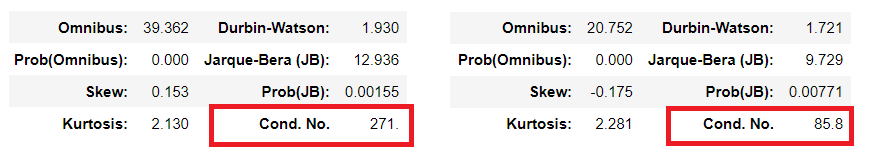

In [37]:
from IPython.display import Image
Image(filename='número condição.png', width = 3000)


**Calculando o número condição**

In [38]:
print('Número condição do modelo 1 :',np.linalg.cond(modelo1.model.exog))
print('Número condição do modelo 2 :',np.linalg.cond(modelo2.model.exog))


Número condição do modelo 1 : 270.83428302907566
Número condição do modelo 2 : 85.793834807165


#### O que fazer em caso de multicolinearidade ?

1) Não fazer nada (não é o ideal);

2) Excluir um dos regressores que está altamente correlacionado com outro (é o ideal a se fazer antes de gerar o modelo);

3) Usar um método de regularização chamado Regressão *Ridge* (para mais informações acessar [aqui](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html)).

## Outros diagnóstico do modelo

- Heterocedasticidade

- Influência de *outliers*

- Teste de linearidade

### O que é heterocedasticidade ?

Violação da suposição de que a variância dos resíduos não são constantes. 

Ao invés de $Var(e_i| X_{1i},X_{2i},\dots,X_{ki}) = \sigma^2$, temos $Var(e_i| X_{1i},X_{2i},\dots,X_{ki}) = \sigma^2_{i}$.

*Consequência*: O Teorema de *Gauss-Markov* deixa de valer e o estimador torna-se ineficiente.

Formas de **identificação**

- Gráfica : gerando um gráfico de dispersão/regressão entre os resíduos e a variável dependente;

- Testes estatísticos: *Goldfeld-Quandt*, *Breusch-Pagan* e *White*.

In [65]:
cerveja2 = cerveja
cerveja2['residuos1'] = modelo1.resid
cerveja2['residuos2'] = modelo2.resid

#### Forma gráfica

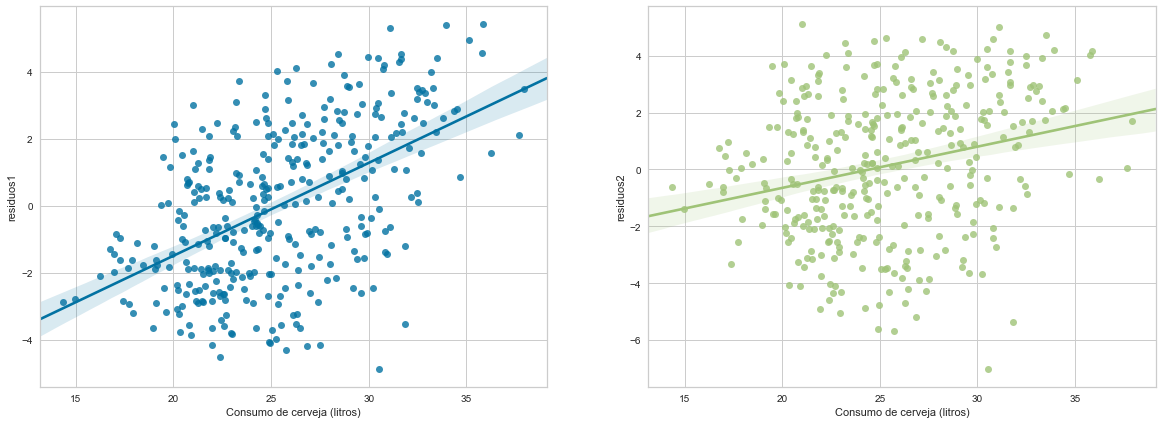

In [66]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.regplot(x='Consumo de cerveja (litros)',y='residuos1',data=cerveja2, ax=ax[0])
sns.regplot(x='Consumo de cerveja (litros)',y='residuos2',data=cerveja2, ax=ax[1]);


#### Teste estatísticos

Teste *Goldfeld-Quandt* : testa se a variância entre duas amostras são não constantes. O *p-valor* da hipótese é de que a variância em uma subamostra é maior do que na outra subamostra.

Para ambos os modelos as variância mostraram-se heterocedásticas.

In [68]:
nomes = ['Estatística F','p-valor','Situação da variância']
testeh = het_goldfeldquandt(modelo1.resid, modelo1.model.exog)
lzip(nomes, testeh)


[('Estatística F', 1.0446927666799872),
 ('p-valor', 0.38584666972430953),
 ('Situação da variância', 'increasing')]

In [67]:
nomes = ['Estatística F','p-valor','Situação da variância']
testeh = het_goldfeldquandt(modelo2.resid, modelo2.model.exog)
lzip(nomes, testeh)


[('Estatística F', 0.953250073927243),
 ('p-valor', 0.6248802785957279),
 ('Situação da variância', 'increasing')]

Teste *Breusch-Pagan* : Testa se os erros quadrados ($e^2_i$) tem relação com os regressores $X_{1i},X_{2i},\dots,X_{ki}$.

Estatística *F* da hipótese é a de que a variância do erro não depende de $X$. Como o *f p-valor* é bem pequeno, podemos considerar que a variância do erro depende de $X$.

In [69]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_breuschpagan(modelo1.resid, modelo1.model.exog)):
    print(i,':',j)
    

Estatística Multiplicador de Lagrange : 31.352601855902844
p-valor : 7.979156260466449e-06
Estatística F : 6.746993460088667
f p-valor : 5.00426367827051e-06


Para o modelo 2.

In [52]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_breuschpagan(modelo2.resid, modelo2.model.exog)):
    print(i,':',j)
    

Estatística Multiplicador de Lagrange : 172.56571154054927
p-valor : 2.9428003798144765e-36
f-valor : 64.56609853881449
f p-valor : 5.46898062929374e-48


Teste *White* :  testa a mesma hipóteses do *Breusch-Pagan* e obtivemos, abaixo, os mesmos resultados.

In [78]:
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_white(modelo1.resid, modelo1.model.exog)):
    print(i,':',j)
    

Estatística Multiplicador de Lagrange : 39.890819533082166
p-valor : 0.003382014584983984
Estatística F : 2.2279693886459695
f p-valor : 0.0024897294986551207


In [228]:
#nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
#for i,j in zip(nomes,het_white(modelo2.resid, modelo2.model.exog)):
 #   print(i,':',j)
    

### Análise de influência

Análise de pontos de alavanca: observações cujo os regressores apresentam padrão atípico.

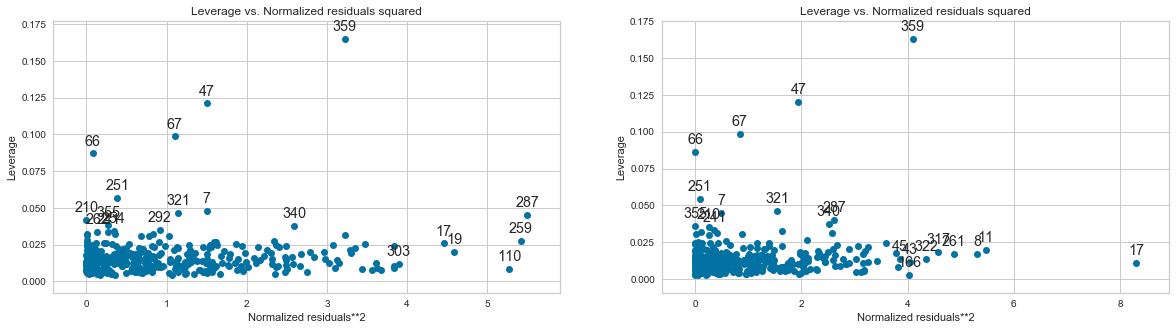

In [117]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_leverage_resid2(modelo1, ax = ax[0])
plot_leverage_resid2(modelo2, ax = ax[1]);


**Distância de Cook**: é uma medida da influência de uma observação ou instâncias em uma regressão linear. Muitos pontos altamente influentes podem não ser adequados para regressão linear.

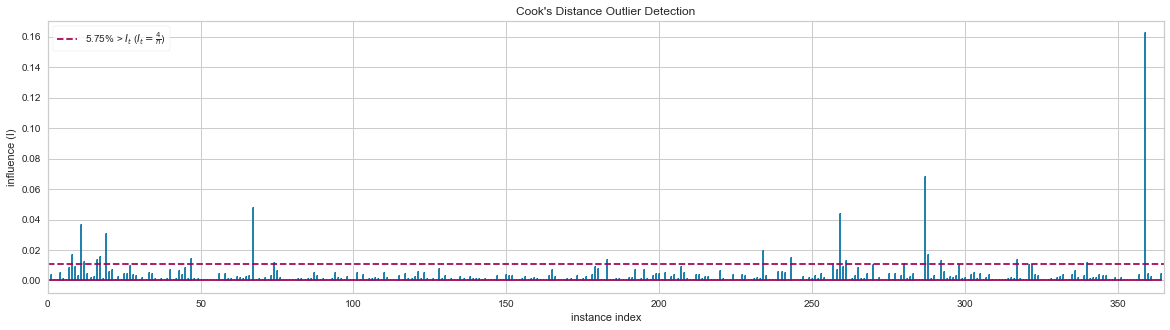

In [118]:
plt.figure(figsize=(20,5))
CooksDistance().fit(X, y).show();


**Realizar outras análises de influência**

In [68]:
OLSInfluence(modelo1)

#.summary_table()

# Métodos: get_resid_studentized_external, plot_index, summary_frame, summary_table

# Propriedades : cooks_distance, cov_ratio, dfbeta, dfbetas, dffits, dffits_internal, ess_press,
#hat_diag_factor, hat_matrix_diag, influence, resid_press, resid_std, #resid_studentized, resid_studentized_external,
#resid_studentized_internal,resid_var, sigma2_not_obsi


**Exemplo** : Plotando a influência

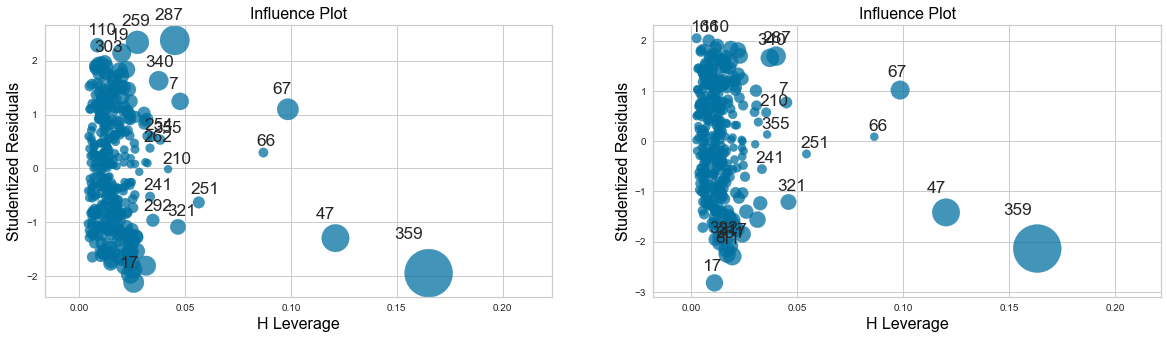

In [233]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
OLSInfluence(modelo1).plot_influence(ax=ax[0])
OLSInfluence(modelo2).plot_influence(ax=ax[1]);


### Teste de linearidade e especificação

**Teste RESET**: O teste *RESET* usa uma regressão aumentada $Y = \beta X + \gamma Z + \epsilon $.

$H_0 : \gamma=0$

$H_1 : \gamma \neq 0$

In [186]:
linear_reset(modelo1, power = 3)


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.12330099]], p-value=0.5702670650325437, df_denom=2>

In [187]:
linear_reset(modelo2, power = 3)


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[57.34772848]], p-value=3.52451194177165e-13, df_denom=2>

Para o modelo 1 houve a aceitação da hipótese nula, então $\gamma$ é não significativo e o modelo é linear. Para o modelo 2 houve rejeição da hipótese nula, então o modelo é não linear.

**Teste Harvey-Collier** : Testa se o modelo está bem especificado.

$H_0$: O modelo está bem especificado

$H_1$: O modelo não está bem especificado

In [70]:
name = ['t-valor', 'p-valor']
test = linear_harvey_collier(modelo1)
lzip(name, test)


[('t-valor', nan), ('p-valor', nan)]

**Teste de Especificação de White**

$H_0$: O modelo é homocedástico e está bem especificado

$H_1$: O modelo não é homocedástico e não está bem especificado

In [205]:
nome = ['Estatística do teste', 'p-valor','Graus de liberdade']
lzip(nome,spec_white(modelo1.resid, modelo1.model.exog))
#spec_white(modelo2.resid, modelo2.model.exog)


[('Estatística do teste', 35.951279826646534),
 ('p-valor', 0.010701864272732915),
 ('Graus de liberdade', 19)]

Para o modelo 1 o *p-valor* ficou abaixo de 5%, sendo assim $H_0$ foi rejeitada. Esse teste só gera resultados caso o modelo tenha intercepto.

**Teste Rainbow** : A hipótese nula é que o ajuste do modelo usando amostra completa é o mesmo que usar um subconjunto central. A alternativa é que os ajustes são diferentes.

In [53]:
nome = ['Estatística do teste', 'p-valor']
lzip(nome,linear_rainbow(modelo1))


[('Estatística do teste', 1.2892667239720166),
 ('p-valor', 0.04506824253380087)]

Como o *p-valor* ficou abaixo de 5%, rejeitamos a hipótese nula.

In [54]:
nome = ['Estatística do teste', 'p-valor']
lzip(nome,linear_rainbow(modelo2))


[('Estatística do teste', 1.3851336872387137),
 ('p-valor', 0.014830045462060166)]

Para o modelo 2 a hipótese nula também é rejeitada.

## Mais testes

Para mais testes e outras análises acessar [aqui](https://www.statsmodels.org/stable/stats.html).

In [56]:
Predicoes = pd.DataFrame(modelo1.predict(), columns=['Predições 1'])
Predicoes['Predições 2'] = modelo2.predict()
Predicoes['Consumo de cerveja (litros)']=cerveja['Consumo de cerveja (litros)']

**Ajuste do modelo 1**

<Figure size 432x288 with 0 Axes>

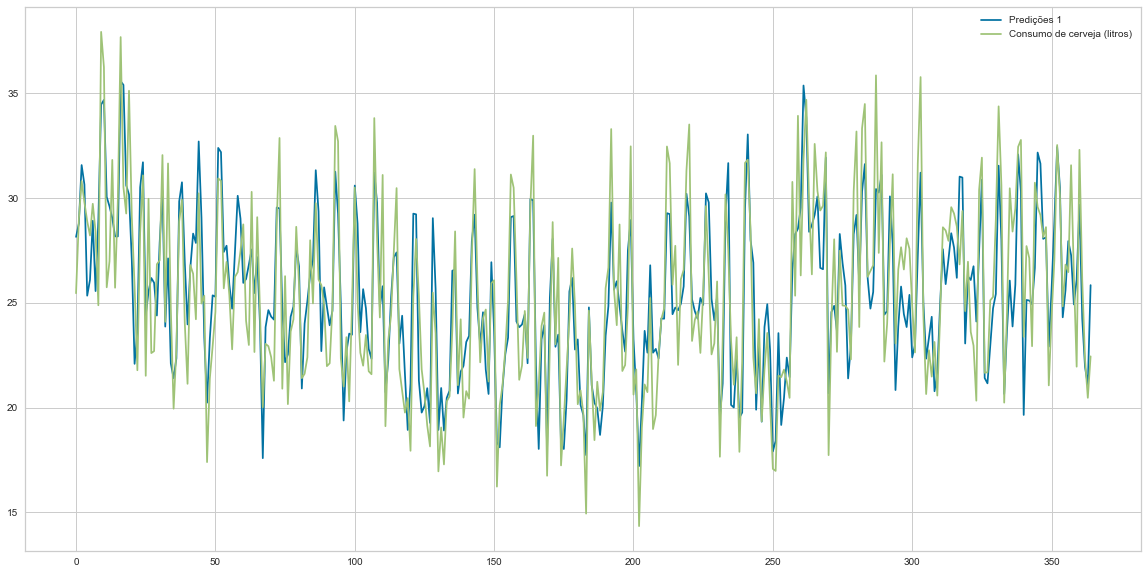

In [60]:
plt.figure()
Predicoes[['Predições 1','Consumo de cerveja (litros)']].plot(figsize=(20,10));


<Figure size 432x288 with 0 Axes>

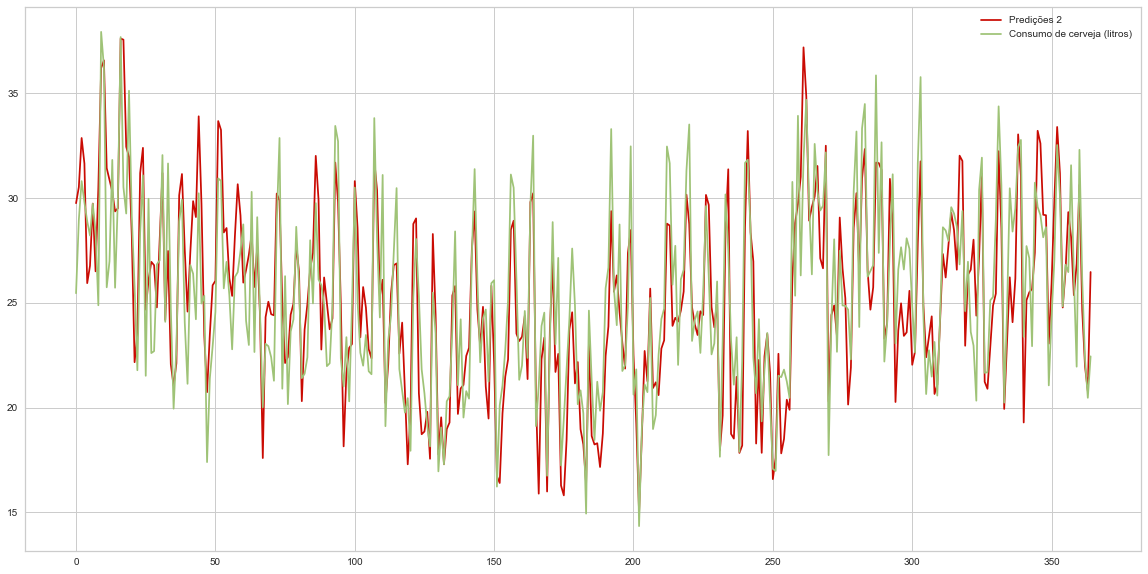

In [62]:
plt.figure()
Predicoes[['Predições 2','Consumo de cerveja (litros)']].plot(figsize=(20,10), color=['r','g']);

## Documentação das bibliotecas usadas

1) [**Statsmodels**](https://www.statsmodels.org/stable/index.html)

2) [**Pandas**](https://pandas.pydata.org/)

3) [**Numpy**](https://numpy.org/)

4) [**Matplotlib**](https://matplotlib.org/)

5) [**Seaborn**](https://seaborn.pydata.org/)

6) [**Scipy**](https://www.scipy.org/docs.html)

7) [**Yellowbrick**](https://www.scikit-yb.org/en/latest/)

## Referências 

GUJARATI, Damodar N.; PORTER, Dawn C. Econometria básica-5. Amgh Editora, 2011.

ANDRADE, Cláudia Sá Malbouisson; TIRYAKI, Gisele Ferreira. Econometria na prática. Alta Books Editora, 2019.


**Críticas e sugestões** : <ivanildo.batista13@gmail.com>

# Obrigado !